# Apply Logistic Regression Assignment 

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
data = pd.read_csv("framingham.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


C:\Users\india\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\india\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\india\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

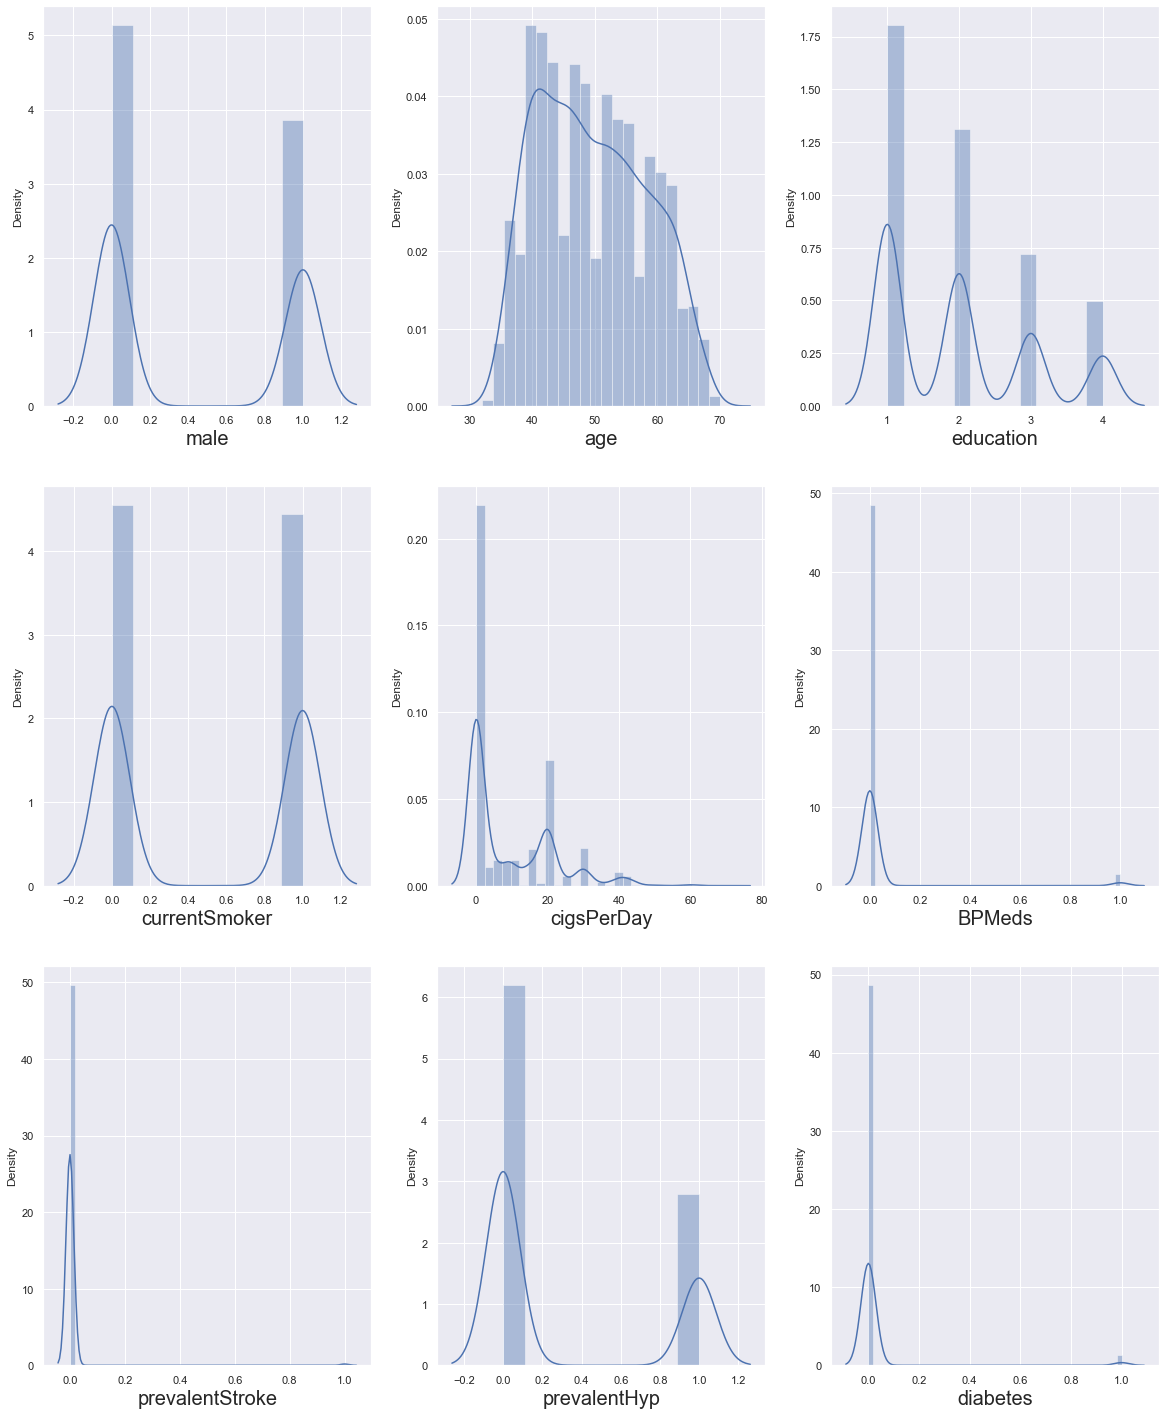

In [3]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [4]:
data['BPMeds'] = data['BPMeds'].fillna(data['BPMeds'].median())
data['totChol'] = data['totChol'].fillna(data['totChol'].median())
data['BMI'] = data['BMI'].fillna(data['BMI'].median())
data['heartRate'] = data['heartRate'].fillna(data['heartRate'].median())
data['glucose'] = data['glucose'].fillna(data['glucose'].median())

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
data=pd.get_dummies(data)

In [7]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64

In [8]:
data = data.dropna(axis = 0, how ='any')

In [9]:
data=data.drop(['education'], axis = 1)

In [10]:
data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4106.000000,4106.000000,4106.000000,4106.000000,4106.000000,4106.000000,4106.000000,4106.000000,4106.000000,4106.000000,4106.000000,4106.000000,4106.000000,4106.000000,4106.00000
mean,0.426936,49.562348,0.491476,9.029956,0.029469,0.006089,0.311495,0.025816,236.572090,132.355577,82.859596,25.775835,75.906722,81.566975,0.15246
std,0.494693,8.571865,0.499988,11.924645,0.169138,0.077801,0.463161,0.158605,43.870197,22.087884,11.942914,4.076050,12.040383,22.934510,0.35951
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.00000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.00000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.00000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,143.875000,89.500000,27.990000,83.000000,85.000000,0.00000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.00000


In [11]:
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [12]:
data.corr()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.027448,0.200370,0.322086,-0.051414,-0.004262,0.006325,0.017836,-0.070704,-0.034107,0.059133,0.080499,-0.116459,0.008634,0.084565
age,-0.027448,1.000000,-0.212968,-0.192461,0.123994,0.058788,0.309358,0.101308,0.266448,0.394907,0.208745,0.135427,-0.010722,0.116763,0.229005
currentSmoker,0.200370,-0.212968,1.000000,0.770367,-0.047440,-0.033109,-0.105824,-0.040231,-0.048605,-0.131359,-0.110482,-0.162875,0.056581,-0.055599,0.018074
cigsPerDay,0.322086,-0.192461,0.770367,1.000000,-0.045731,-0.033281,-0.069527,-0.034928,-0.026069,-0.090378,-0.056606,-0.089508,0.071776,-0.055269,0.054110
BPMeds,-0.051414,0.123994,-0.047440,-0.045731,1.000000,0.115947,0.259063,0.044281,0.082758,0.253783,0.193737,0.100318,0.017738,0.050830,0.090350
prevalentStroke,-0.004262,0.058788,-0.033109,-0.033281,0.115947,1.000000,0.075801,0.007000,0.000335,0.057782,0.046014,0.025092,-0.018117,0.019090,0.062608
prevalentHyp,0.006325,0.309358,-0.105824,-0.069527,0.259063,0.075801,1.000000,0.076211,0.165680,0.696395,0.616141,0.299747,0.150109,0.085446,0.179955
diabetes,0.017836,0.101308,-0.040231,-0.034928,0.044281,0.007000,0.076211,1.000000,0.041080,0.110238,0.049755,0.082463,0.046802,0.606072,0.097576
totChol,-0.070704,0.266448,-0.048605,-0.026069,0.082758,0.000335,0.165680,0.041080,1.000000,0.210951,0.168206,0.116489,0.086957,0.048252,0.084362
sysBP,-0.034107,0.394907,-0.131359,-0.090378,0.253783,0.057782,0.696395,0.110238,0.210951,1.000000,0.783859,0.324494,0.185891,0.138082,0.218928


<AxesSubplot:>

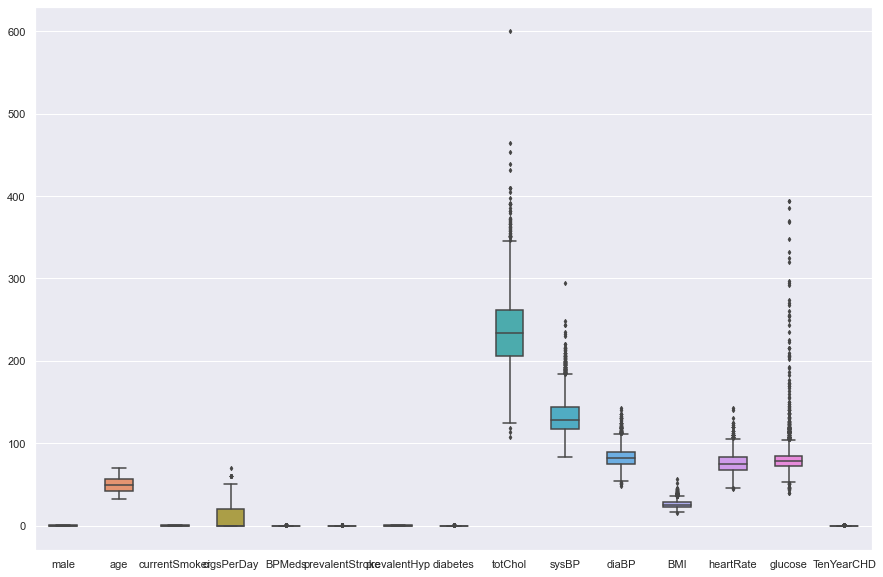

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

C:\Users\india\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\india\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\india\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

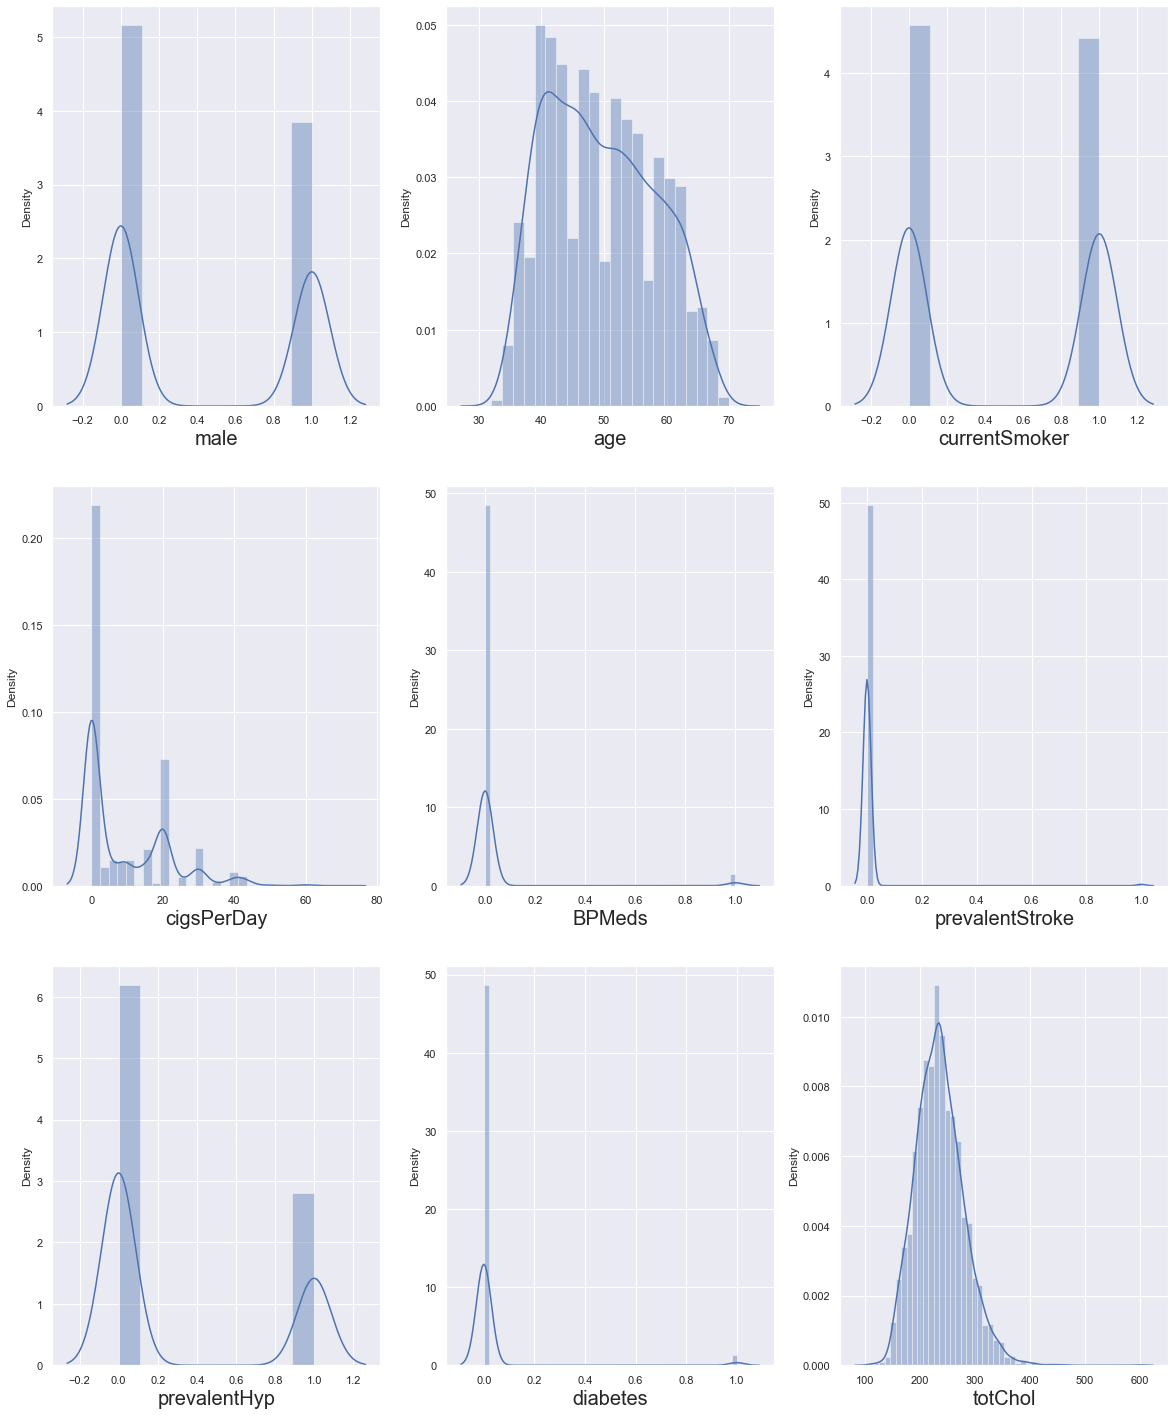

In [14]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [15]:
x = data.drop(columns= ['TenYearCHD'])
y = data['TenYearCHD']                            

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform

In [18]:
data.corr()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.027448,0.200370,0.322086,-0.051414,-0.004262,0.006325,0.017836,-0.070704,-0.034107,0.059133,0.080499,-0.116459,0.008634,0.084565
age,-0.027448,1.000000,-0.212968,-0.192461,0.123994,0.058788,0.309358,0.101308,0.266448,0.394907,0.208745,0.135427,-0.010722,0.116763,0.229005
currentSmoker,0.200370,-0.212968,1.000000,0.770367,-0.047440,-0.033109,-0.105824,-0.040231,-0.048605,-0.131359,-0.110482,-0.162875,0.056581,-0.055599,0.018074
cigsPerDay,0.322086,-0.192461,0.770367,1.000000,-0.045731,-0.033281,-0.069527,-0.034928,-0.026069,-0.090378,-0.056606,-0.089508,0.071776,-0.055269,0.054110
BPMeds,-0.051414,0.123994,-0.047440,-0.045731,1.000000,0.115947,0.259063,0.044281,0.082758,0.253783,0.193737,0.100318,0.017738,0.050830,0.090350
prevalentStroke,-0.004262,0.058788,-0.033109,-0.033281,0.115947,1.000000,0.075801,0.007000,0.000335,0.057782,0.046014,0.025092,-0.018117,0.019090,0.062608
prevalentHyp,0.006325,0.309358,-0.105824,-0.069527,0.259063,0.075801,1.000000,0.076211,0.165680,0.696395,0.616141,0.299747,0.150109,0.085446,0.179955
diabetes,0.017836,0.101308,-0.040231,-0.034928,0.044281,0.007000,0.076211,1.000000,0.041080,0.110238,0.049755,0.082463,0.046802,0.606072,0.097576
totChol,-0.070704,0.266448,-0.048605,-0.026069,0.082758,0.000335,0.165680,0.041080,1.000000,0.210951,0.168206,0.116489,0.086957,0.048252,0.084362
sysBP,-0.034107,0.394907,-0.131359,-0.090378,0.253783,0.057782,0.696395,0.110238,0.210951,1.000000,0.783859,0.324494,0.185891,0.138082,0.218928


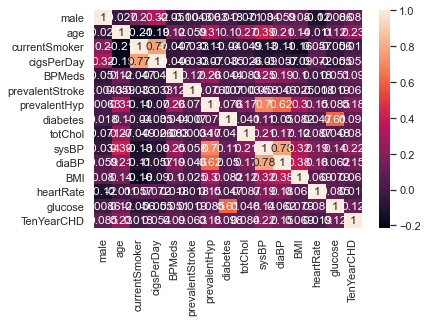

In [19]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [21]:
model = LogisticRegression()

In [22]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

C:\Users\india\anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_pred = log_reg.predict(x_test)

In [24]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8418491484184915

In [25]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[686,   3],
       [127,   6]], dtype=int64)

In [26]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [27]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8418491484184915